In [19]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('housing_train.csv')

In [11]:
df

,id,price,type,beds,baths,cats_allowed,dogs_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,parking_options,lat,long
0,7039061606,1195,apartment,3,2.0,1,1,0,0,0,street parking,33.4226,-86.7065
1,7041970863,1120,apartment,3,2.0,1,1,0,0,0,off-street parking,33.3755,-86.8045
2,7041966914,825,apartment,1,1.5,1,1,0,0,0,street parking,33.4226,-86.7065
3,7041966936,800,apartment,1,1.0,1,1,0,0,0,street parking,33.4226,-86.7065
4,7041966888,785,apartment,2,1.0,1,1,0,0,0,street parking,33.4226,-86.7065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,0,apartment,2,2.0,1,1,0,0,0,detached garage,40.0495,-83.0669
265186,7050887997,1069,apartment,2,1.5,1,1,0,0,0,detached garage,39.8408,-83.0804
265187,7044801015,1507,apartment,2,1.5,1,1,0,0,0,NaN,40.0564,-83.0417
265188,7050885800,1001,apartment,3,1.5,1,1,0,0,0,off-street parking,40.0451,-82.4564


In [12]:
df.columns

Index(['id', 'price', 'type', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'parking_options', 'lat', 'long'],
      dtype='object')

In [13]:
print(df.isnull().sum())

id                             0
price                          0
type                           0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
parking_options            95135
lat                         1419
long                        1419
dtype: int64


In [14]:
df = df.dropna(subset=['lat', 'long'])

In [15]:
df = df.dropna(subset=['parking_options'])

In [16]:
print(df.isnull().sum())

id                         0
price                      0
type                       0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
parking_options            0
lat                        0
long                       0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169327 entries, 0 to 265188
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       169327 non-null  int64  
 1   price                    169327 non-null  int64  
 2   type                     169327 non-null  object 
 3   beds                     169327 non-null  int64  
 4   baths                    169327 non-null  float64
 5   cats_allowed             169327 non-null  int64  
 6   dogs_allowed             169327 non-null  int64  
 7   wheelchair_access        169327 non-null  int64  
 8   electric_vehicle_charge  169327 non-null  int64  
 9   comes_furnished          169327 non-null  int64  
 10  parking_options          169327 non-null  object 
 11  lat                      169327 non-null  float64
 12  long                     169327 non-null  float64
dtypes: float64(3), int64(8), object(2)
memory usage: 18.1+ MB


In [18]:
df.describe()

,id,price,beds,baths,cats_allowed,dogs_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,1.693270e+05,1.693270e+05,169327.000000,169327.000000,169327.000000,169327.000000,169327.000000,169327.000000,169327.000000,169327.000000,169327.000000
mean,7.040965e+09,1.840291e+04,1.933366,1.475952,0.764261,0.738854,0.100338,0.018863,0.059672,37.745954,-93.985913
std,8.844143e+06,6.728057e+06,4.573650,0.646336,0.424461,0.439260,0.300452,0.136041,0.236878,5.742552,17.568312
min,7.004010e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035956e+09,8.200000e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.976100,-105.239000
50%,7.043386e+09,1.076000e+03,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.660300,-88.243600
75%,7.048473e+09,1.500000e+03,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.589700,-81.548600
max,7.051263e+09,2.768307e+09,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


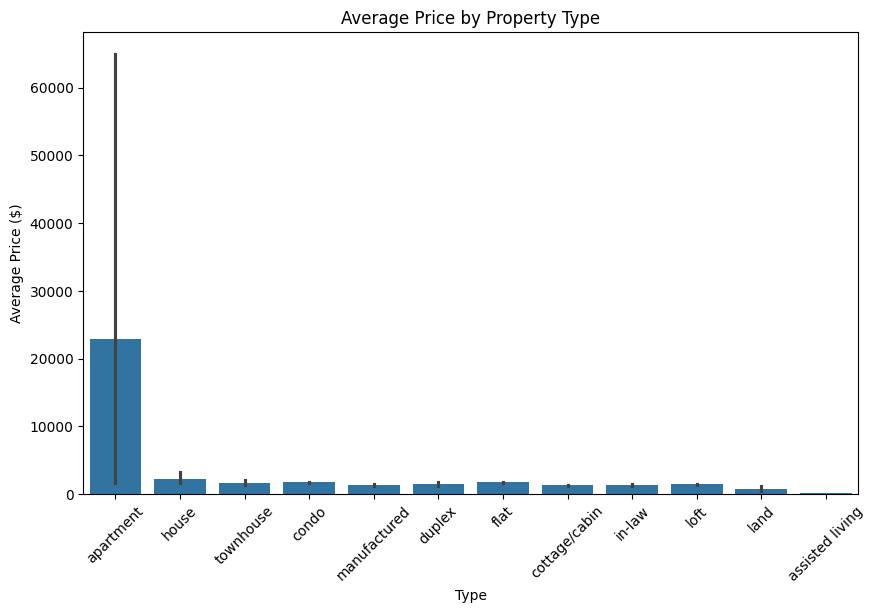

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=df)
plt.title("Average Price by Property Type")
plt.xticks(rotation=45)
plt.xlabel("Type")
plt.ylabel("Average Price ($)")
plt.show()

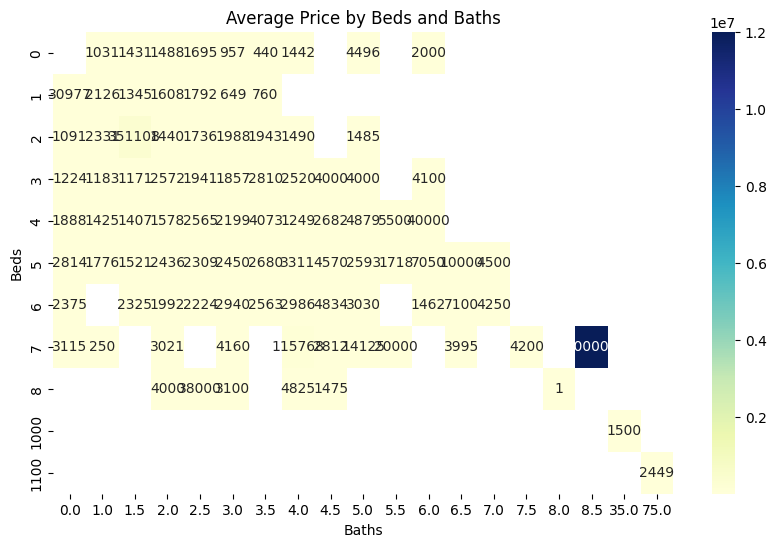

In [23]:
pivot = df.pivot_table(index='beds', columns='baths', values='price', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Average Price by Beds and Baths")
plt.xlabel("Baths")
plt.ylabel("Beds")
plt.show()

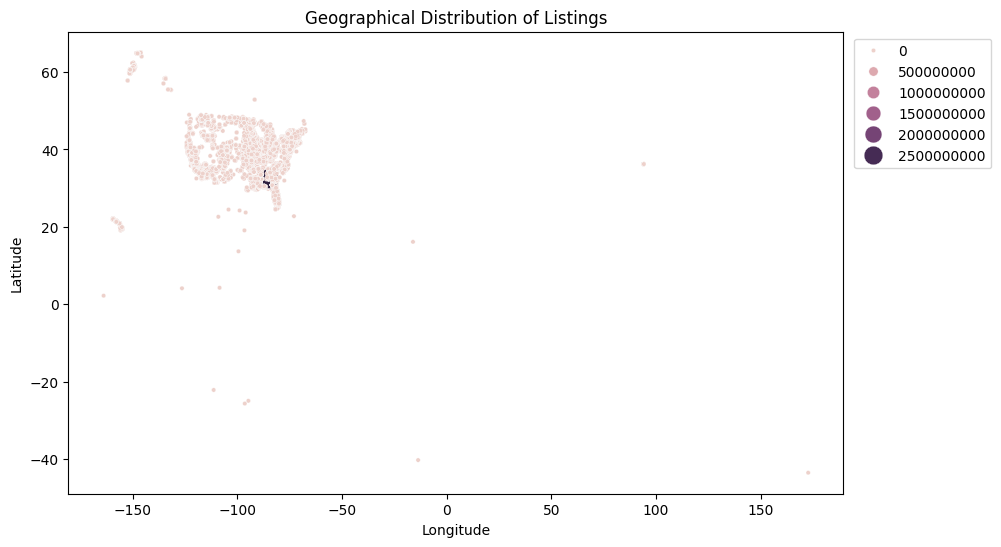

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', size='price', sizes=(10, 200), data=df)
plt.title("Geographical Distribution of Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [92]:
y = df['price']
x = df.drop(['id', 'price'], axis=1)

In [93]:
df.columns

Index(['id', 'price', 'type', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'parking_options', 'lat', 'long'],
      dtype='object')

In [94]:
x

,type,beds,baths,cats_allowed,dogs_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,parking_options,lat,long
0,apartment,3,2.0,1,1,0,0,0,street parking,33.4226,-86.7065
1,apartment,3,2.0,1,1,0,0,0,off-street parking,33.3755,-86.8045
2,apartment,1,1.5,1,1,0,0,0,street parking,33.4226,-86.7065
3,apartment,1,1.0,1,1,0,0,0,street parking,33.4226,-86.7065
4,apartment,2,1.0,1,1,0,0,0,street parking,33.4226,-86.7065
...,...,...,...,...,...,...,...,...,...,...,...
265183,apartment,2,2.0,1,1,0,0,0,street parking,39.8971,-82.8957
265184,apartment,1,1.0,1,1,1,0,0,off-street parking,39.9709,-82.9241
265185,apartment,2,2.0,1,1,0,0,0,detached garage,40.0495,-83.0669
265186,apartment,2,1.5,1,1,0,0,0,detached garage,39.8408,-83.0804


In [95]:
y

0         1195
1         1120
2          825
3          800
4          785
          ... 
265183     870
265184     929
265185       0
265186    1069
265188    1001
Name: price, Length: 169327, dtype: int64

In [96]:
for col in x.columns:
    print(col, '--', x[col].unique())
    print()

type -- ['apartment' 'house' 'townhouse' 'condo' 'manufactured' 'duplex' 'flat'
 'cottage/cabin' 'in-law' 'loft' 'land' 'assisted living']

beds -- [   3    1    2    4    0    5    6    7    8 1000 1100]

baths -- [ 2.   1.5  1.   2.5  3.5  0.   3.   4.   4.5  5.   6.5  6.   5.5  7.
  8.5 35.  75.   7.5  8. ]

cats_allowed -- [1 0]

dogs_allowed -- [1 0]

wheelchair_access -- [0 1]

electric_vehicle_charge -- [0 1]

comes_furnished -- [0 1]

parking_options -- ['street parking' 'off-street parking' 'carport' 'attached garage'
 'detached garage' 'no parking' 'valet parking']

lat -- [33.4226 33.3755 33.4283 ... 36.1287 39.8408 40.0451]

long -- [-86.7065 -86.8045 -86.7183 ... -82.975  -83.0804 -82.4564]



In [100]:
x = pd.get_dummies(x).astype(int)

In [101]:
x

,beds,baths,cats_allowed,dogs_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,type_apartment,...,type_loft,type_manufactured,type_townhouse,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,3,2,1,1,0,0,0,33,-86,1,...,0,0,0,0,0,0,0,0,1,0
1,3,2,1,1,0,0,0,33,-86,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,0,0,0,33,-86,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,33,-86,1,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,1,0,0,0,33,-86,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265183,2,2,1,1,0,0,0,39,-82,1,...,0,0,0,0,0,0,0,0,1,0
265184,1,1,1,1,1,0,0,39,-82,1,...,0,0,0,0,0,0,0,1,0,0
265185,2,2,1,1,0,0,0,40,-83,1,...,0,0,0,0,0,1,0,0,0,0
265186,2,1,1,1,0,0,0,39,-83,1,...,0,0,0,0,0,1,0,0,0,0


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 5667697501.49596
R2 Score: -0.39277356443834854


In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [107]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets